In [54]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('../data/heart_disease.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholerstoral,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,target
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,3.0,0.0,6.0,0
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,2.0,3.0,3.0,2
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,2.0,2.0,7.0,1
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,3.0,0.0,3.0,0
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,1.0,0.0,3.0,0


In [56]:
X = df.drop('target', axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholerstoral,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,3.0,0.0,6.0
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,2.0,3.0,3.0
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,2.0,2.0,7.0
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,3.0,0.0,3.0
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,1.0,0.0,3.0


In [57]:
y = df['target']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

In [58]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [59]:
X_pca

array([[ 1.31105772,  0.33280402,  1.46816757, ...,  0.37891299,
        -0.29029451,  0.61200979],
       [ 0.1502463 ,  3.95152006, -0.50140352, ...,  0.68211311,
        -0.09321407, -0.49846638],
       [ 3.21403327,  0.99649286, -0.97008289, ...,  0.18008277,
         0.31495344, -0.187094  ],
       ...,
       [ 2.59855924, -1.03690872, -1.99529528, ...,  0.16755377,
         0.29043176, -0.21168588],
       [-2.06462863,  0.53496119,  0.8818507 , ..., -0.17418474,
         0.340207  , -0.3116217 ],
       [-2.5057765 , -1.77267102, -0.2020599 , ...,  0.0881518 ,
        -0.27054568, -0.13708667]])

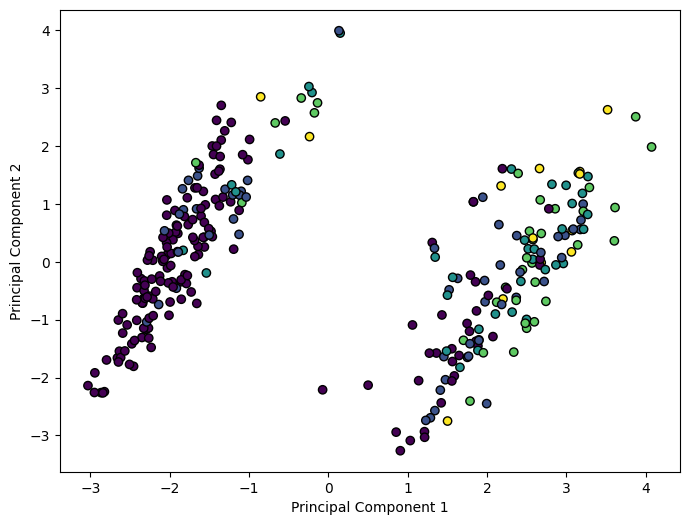

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

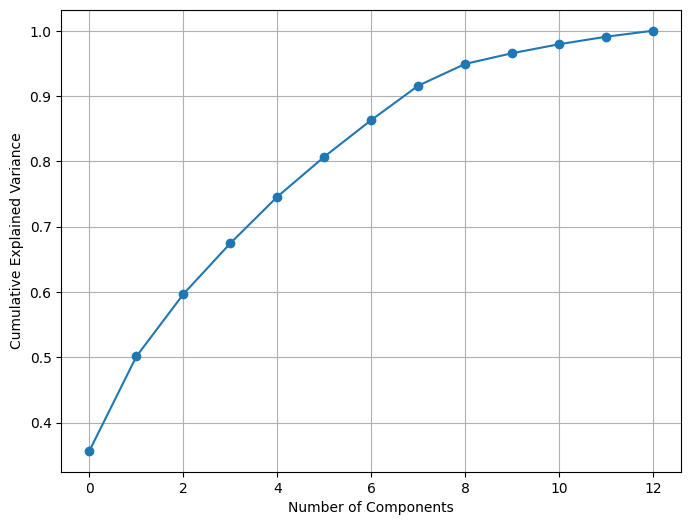

In [61]:
plt.figure(figsize=(8,6))
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [62]:
optimal_components = np.argmax(cum_var > 0.95) + 1
print(optimal_components)

10


In [63]:
pca = PCA(n_components=10) # optimal PCA
X_pca = pca.fit_transform(X)

In [65]:
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y.values
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,1.311058,0.332804,1.468168,-1.864509,1.021794,-0.232216,-0.985680,-1.606597,0.457607,0.667147,0
1,0.150246,3.951520,-0.501404,-0.122199,-0.206392,-0.483065,0.186336,0.988860,-1.251221,-0.048622,2
2,3.214033,0.996493,-0.970083,0.298344,0.456858,-0.781646,-0.839274,0.090186,0.668076,-0.251773,1
3,-1.657827,-0.718991,-0.354397,-0.899603,1.439286,3.000166,-0.896167,0.698644,0.443489,0.499317,0
4,-2.325091,-0.629728,0.487536,-0.534600,1.750575,0.012264,-0.455098,0.121394,-0.213362,-0.359154,0


In [66]:
pca_df.to_csv('../data/heart_disease_pca.csv', index=False)